In [ ]:
import os

dataset_root = "/home/sg/Music/TB DATASET/DATASET"

splits = ["train", "val", "test"]
categories = ["NORMAL", "TUBERCULOSIS"]

if not os.path.exists(dataset_root):
    print(f"❌ Root directory not found: {dataset_root}")
else:
    print(f"✅ Root directory exists: {dataset_root}")

for split in splits:
    split_path = os.path.join(dataset_root, split)
    
    if not os.path.exists(split_path):
        print(f"❌ Missing split folder: {split_path}")
        continue
    
    print(f"\n✅ Checking: {split_path}")

    for category in categories:
        category_path = os.path.join(split_path, category)

        if not os.path.exists(category_path):
            print(f"❌ Missing category folder: {category_path}")
        else:
            num_files = len(os.listdir(category_path))
            if num_files == 0:
                print(f"⚠️ No images found in: {category_path}")
            else:
                print(f"✅ {category}: {num_files} images found")


✅ Root directory exists: /home/sg/Music/TB DATASET/DATASET

✅ Checking: /home/sg/Music/TB DATASET/DATASET/train
✅ NORMAL: 4907 images found
✅ TUBERCULOSIS: 5971 images found

✅ Checking: /home/sg/Music/TB DATASET/DATASET/val
✅ NORMAL: 548 images found
✅ TUBERCULOSIS: 434 images found

✅ Checking: /home/sg/Music/TB DATASET/DATASET/test
✅ NORMAL: 548 images found
✅ TUBERCULOSIS: 434 images found


In [ ]:
import pathlib

dataset_path = pathlib.Path("/home/sg/Music/TB DATASET/DATASET")

def create_dataset_dict(split):
    split_path = dataset_path / split  
    dataset_dict = {}
    
    for class_dir in split_path.iterdir():  
        if class_dir.is_dir(): 
            dataset_dict[class_dir.name] = list(class_dir.glob("*"))
    
    return dataset_dict

train_dic = create_dataset_dict("train")
val_dic = create_dataset_dict("val")
test_dic = create_dataset_dict("test")
aug_train_dic = create_dataset_dict("aug_train_dic")

print("Train Dictionary Sample:", {k: len(v) for k, v in train_dic.items()})
print("Validation Dictionary Sample:", {k: len(v) for k, v in val_dic.items()})
print("Test Dictionary Sample:", {k: len(v) for k, v in test_dic.items()})
print("Aug train Dictionary Sample:", {k: len(v) for k, v in aug_train_dic.items()})



Train Dictionary Sample: {'TUBERCULOSIS': 5971, 'NORMAL': 4907}
Validation Dictionary Sample: {'TUBERCULOSIS': 434, 'NORMAL': 548}
Test Dictionary Sample: {'TUBERCULOSIS': 434, 'NORMAL': 548}
Aug train Dictionary Sample: {'TUBERCULOSIS': 12925, 'NORMAL': 11803}


In [6]:
import numpy as np
import cv2
from pathlib import Path

preprocessed_dic = {}

for label, image_paths in aug_train_dic.items():
    preprocessed_images = []
    
    for image_path in image_paths:
        img = cv2.imread(str(image_path))  
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        img = cv2.resize(img, (32, 32))
        
        img = img.astype(np.float32) / 255.0
        
        preprocessed_images.append(img)
    
    preprocessed_dic[label] = np.array(preprocessed_images)



In [13]:
import numpy as np
import cv2
from pathlib import Path

preprocessed_test_dic = {}

for label, image_paths in test_dic.items():
    preprocessed_timages = []  
    
    for image_path in image_paths:
        img = cv2.imread(str(image_path))  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        img = img.astype(np.float32) / 255.0

        preprocessed_timages.append(img)  
    
    preprocessed_test_dic[label] = np.array(preprocessed_timages)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Reduced dropout
    Dense(64, activation='relu'),
    Dropout(0.4),  
    
    Dense(1, activation='sigmoid') 
])

# Reduce learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,129 (656.75 KB)

 Trainable params: 167,681 (655.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
import numpy as np

def convert_dic_to_numpy(preprocessed_dic):
    X = []
    y = []
    
    for label, images in preprocessed_dic.items():
        X.extend(images)  # Append images
        y.extend([0 if label == "NORMAL" else 1] * len(images))  # Assign labels
    
    return np.array(X), np.array(y)

# Convert train and test datasets
X_train, y_train = convert_dic_to_numpy(preprocessed_dic)
X_test, y_test = convert_dic_to_numpy(preprocessed_test_dic)

print("Training Set Shape:", X_train.shape, "Training Labels Shape:", y_train.shape)
print("Testing Set Shape:", X_test.shape, "Testing Labels Shape:", y_test.shape)


Training Set Shape: (24728, 32, 32, 3) Training Labels Shape: (24728,)
Testing Set Shape: (982, 32, 32, 3) Testing Labels Shape: (982,)


In [36]:
import numpy as np
from sklearn.utils import shuffle

def balance_classes(preprocessed_dic):
    normal_images = preprocessed_dic['NORMAL']
    tb_images = preprocessed_dic['TUBERCULOSIS']

    # Find the minimum number of samples between both classes
    min_samples = min(len(normal_images), len(tb_images))

    # Select `min_samples` images from each class
    normal_balanced = normal_images[:min_samples]
    tb_balanced = tb_images[:min_samples]

    # Combine them into a single dataset
    X_balanced = np.vstack((normal_balanced, tb_balanced))
    y_balanced = np.hstack((np.zeros(min_samples), np.ones(min_samples)))  # 0 for NORMAL, 1 for TUBERCULOSIS

    # Shuffle the dataset
    X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)

    return X_balanced, y_balanced

# Convert dictionary to balanced numpy arrays
X_train, y_train = balance_classes(preprocessed_dic)

# Print final dataset shape
print(f"Balanced X_train shape: {X_train.shape}")
print(f"Balanced y_train shape: {y_train.shape}")


Balanced X_train shape: (23606, 32, 32, 3)
Balanced y_train shape: (23606,)


In [37]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, 32, 32, 3)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 32, 32, 3)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)


X_train shape: (23606, 32, 32, 3)
y_train shape: (23606,)
X_test shape: (982, 32, 32, 3)
y_test shape: (982,)


In [38]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test), 
    epochs=20,  
    batch_size=32,  
    verbose=1
)


Epoch 1/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.8133 - loss: 0.4132 - val_accuracy: 0.8707 - val_loss: 0.2687
Epoch 2/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9174 - loss: 0.1864 - val_accuracy: 0.6843 - val_loss: 0.7283
Epoch 3/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9272 - loss: 0.1567 - val_accuracy: 0.8523 - val_loss: 0.2746
Epoch 4/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9371 - loss: 0.1427 - val_accuracy: 0.5682 - val_loss: 2.4069
Epoch 5/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9438 - loss: 0.1219 - val_accuracy: 0.9318 - val_loss: 0.1569
Epoch 6/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9483 - loss: 0.1109 - val_accuracy: 0.9145 - val_loss: 0.1830
Epoch 7/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9533 - loss: 0.1030 - val_accuracy: 0.6660 - val_loss: 0.7914
Epoch 8/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9534 - loss: 0.1007 - 

In [44]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9596 - loss: 0.1385
Test Accuracy: 0.9155


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
 [[473  75]
 [  8 426]]


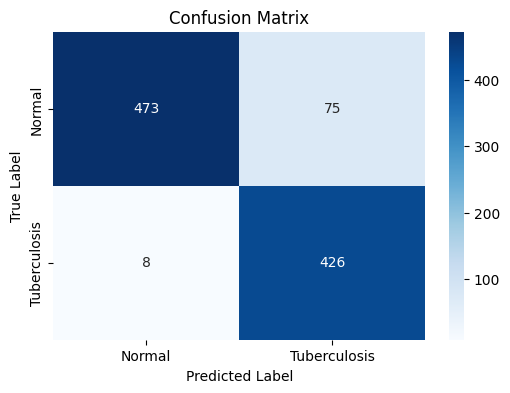

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.86      0.92       548
Tuberculosis       0.85      0.98      0.91       434

    accuracy                           0.92       982
   macro avg       0.92      0.92      0.92       982
weighted avg       0.92      0.92      0.92       982



In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions on test set
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Print classification report for more insights
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Normal", "Tuberculosis"]))


In [51]:
import os
import cv2
import numpy as np
from pathlib import Path

# Define validation dataset path
val_path = "/home/sg/Music/TB DATASET/DATASET/val"

# Initialize dictionary to store processed images
preprocessed_val_dic = {}

# Categories in dataset
categories = ["NORMAL", "TUBERCULOSIS"]

# Process each category
for label in categories:
    image_dir = Path(val_path) / label
    if not image_dir.exists():
        print(f"❌ Directory not found: {image_dir}")
        continue

    # Print path for debugging
    print(f"📂 Processing: {image_dir}")

    # Try different file extensions
    image_paths = list(image_dir.glob("*.*"))  # Include all file types

    preprocessed_vimages = []
    
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            print(f"⚠️ Skipping unreadable file: {image_path}")  # Handle corrupted images
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        img = img.astype(np.float32) / 255.0  # Normalize

        preprocessed_vimages.append(img)
    
    preprocessed_val_dic[label] = np.array(preprocessed_vimages)

# Print count of images per class
class_counts = {label: len(images) for label, images in preprocessed_val_dic.items()}
print("\n📊 Validation Dataset Class Distribution:", class_counts)


📂 Processing: /home/sg/Music/TB DATASET/DATASET/val/NORMAL
📂 Processing: /home/sg/Music/TB DATASET/DATASET/val/TUBERCULOSIS

📊 Validation Dataset Class Distribution: {'NORMAL': 548, 'TUBERCULOSIS': 434}


In [52]:
import numpy as np
from sklearn.utils import resample

# Convert dictionary to numpy arrays
def convert_dic_to_numpy(preprocessed_dic):
    X, y = [], []
    for label, images in preprocessed_dic.items():
        X.extend(images)
        y.extend([1 if label == "TUBERCULOSIS" else 0] * len(images))  

    return np.array(X), np.array(y)

# Prepare validation data
X_val, y_val = convert_dic_to_numpy(preprocessed_val_dic)

# Print class distribution
unique, counts = np.unique(y_val, return_counts=True)
print("Class distribution in validation set:", dict(zip(unique, counts)))


Class distribution in validation set: {np.int64(0): np.int64(548), np.int64(1): np.int64(434)}


In [53]:
# Separate classes
normal_X = X_val[y_val == 0]
normal_y = y_val[y_val == 0]
tb_X = X_val[y_val == 1]
tb_y = y_val[y_val == 1]

# Undersample NORMAL to match TUBERCULOSIS count (434)
normal_X_resampled, normal_y_resampled = resample(normal_X, normal_y, 
                                                  n_samples=len(tb_X), 
                                                  random_state=42)

# Merge balanced dataset
X_val_balanced = np.concatenate((normal_X_resampled, tb_X), axis=0)
y_val_balanced = np.concatenate((normal_y_resampled, tb_y), axis=0)

# Shuffle dataset
indices = np.arange(len(X_val_balanced))
np.random.shuffle(indices)
X_val_balanced = X_val_balanced[indices]
y_val_balanced = y_val_balanced[indices]

print("Balanced class distribution:", np.bincount(y_val_balanced))


Balanced class distribution: [434 434]


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9270 - loss: 0.2247
Validation Accuracy: 0.9228
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
 [[372  62]
 [  5 429]]


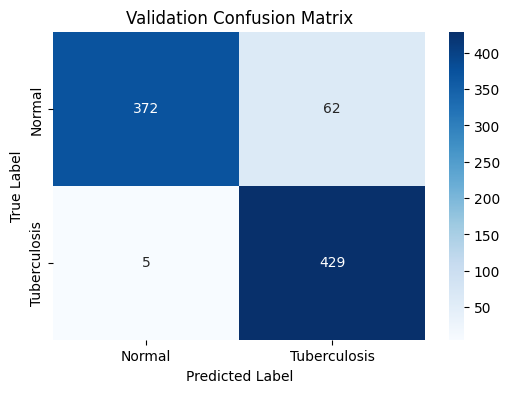

Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.86      0.92       434
Tuberculosis       0.87      0.99      0.93       434

    accuracy                           0.92       868
   macro avg       0.93      0.92      0.92       868
weighted avg       0.93      0.92      0.92       868



In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model
val_loss, val_acc = model.evaluate(X_val_balanced, y_val_balanced)
print(f"Validation Accuracy: {val_acc:.4f}")

# Get predictions
y_pred_probs = model.predict(X_val_balanced)  
y_pred = (y_pred_probs > 0.5).astype(int)  

# Compute confusion matrix
cm = confusion_matrix(y_val_balanced, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Normal", "Tuberculosis"], 
            yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Validation Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_val_balanced, y_pred, target_names=["Normal", "Tuberculosis"]))


In [81]:
import cv2
import numpy as np

# Define class labels (Assuming 0 = NORMAL, 1 = TUBERCULOSIS)
class_labels = ["NORMAL", "TUBERCULOSIS"]

def predict_with_cnn(model, image_path):
    """
    Predicts the class of an image using the CNN model.
    
    Parameters:
        model: Loaded CNN model.
        image_path (str): Path to the input image.
    
    Returns:
        None (Prints Prediction Result)
    """
    # ✅ Load the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"❌ Error: Could not load image at {image_path}. Check if the path is correct.")
        return

    # ✅ Convert BGR to RGB (OpenCV loads in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ✅ Resize to match CNN input size (32x32)
    img = cv2.resize(img, (32, 32))

    # ✅ Normalize pixel values (0-1 range)
    img = img.astype(np.float32) / 255.0

    # ✅ Expand dimensions to match model input shape (1, 32, 32, 3)
    img = np.expand_dims(img, axis=0)

    # ✅ Predict using CNN model
    prediction = model.predict(img)

    # ✅ Get the class with the highest probability
    predicted_class = 1 if prediction[0][0] > 0.5 else 0

    # ✅ Print the result
    print(f"🔹 Predicted Class: {class_labels[predicted_class]}")
    print(f"🔹 Confidence Score: {prediction[0][0]:.4f}")

# Example usage
image_path = "/home/sg/Music/TB DATASET/DATASET/aug_train_dic/TUBERCULOSIS/aug_0_train_tuberculosis_8.png"  # Change this to your image path
predict_with_cnn(model, image_path)  # Pass your loaded CNN model here


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
🔹 Predicted Class: TUBERCULOSIS
🔹 Confidence Score: 1.0000


In [82]:
# Save the trained CNN model
model.save("cnn.h5")

print("✅ CNN model saved as cnn.h5")


✅ CNN model saved as cnn.h5


In [83]:
from tensorflow.keras.models import load_model

# Load CNN model (choose the correct file extension)
cnn_model = load_model("cnn.h5")  # OR use "cnn.h5"

print("✅ CNN model loaded successfully!")


✅ CNN model loaded successfully!
